In [688]:
import numpy as np
import sympy as sp
import matplotlib.pyplot as plt
import scipy.signal as sig

np.set_printoptions(6, suppress=True)

plt.style.use([
    'grid',
    'notebook'
])

In [689]:
# design low pass filter
filter = sig.butter(1, .01, 'lowpass')

In [690]:
A_vertices = []
B_vertices = []

Ts = 1

r = 31
mu = 40
sigma = 55
A2 = np.pi * r**2

Kb = 15.92

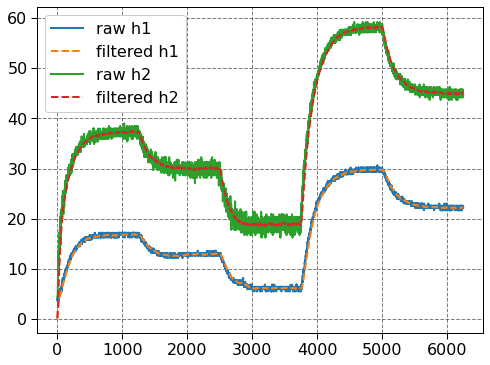

In [691]:
h1 = np.load('./data/level3.npy')
h2 = np.load('./data/level4.npy')

filtered_h1 = sig.lfilter(filter[0], filter[1], h1)
filtered_h2 = sig.lfilter(filter[0], filter[1], h2)

plt.plot(h1[::2], label='raw h1')
plt.plot(filtered_h1[::2], '--', label='filtered h1')

plt.plot(h2[::2], label='raw h2')
plt.plot(filtered_h2[::2], '--', label='filtered h2')

plt.legend()

h1 = filtered_h1
h2 = filtered_h2

In [692]:
k1, k2, k3 = 1.04*(16.46), 0.95*(32.4), 0.93*(185.48)
b2, b3 = 0.95*(-83.93), 0.93*(-167.01)

In [693]:
diff = h2 - h1

R12 = (k2*diff + b2)
R12[diff < 5] = 74.38

q0 = .965*(k3 * np.sqrt(h1) + b3)

l2 = np.cos(2.5*np.pi * (h1 - mu)) / (sigma * np.sqrt(2 * np.pi))
l3 = np.exp(-((h1 - mu)**2) / (2 * sigma**2))

A1 = ((3*r)/5) * (2.7*r - (l2 * l3))

Z1 = 1/A1
Z2 = 1/R12
Z3 = q0/h2

Z1_bounds = np.array([
    np.min(Z1), np.max(Z1)
])

Z2_bounds = np.array([
    np.min(Z2), np.max(Z2)
])

Z3_bounds = np.array([
    np.min(Z3), np.max(Z3)
])

for z1 in Z1_bounds:
    for z2 in Z2_bounds:
        for z3 in Z3_bounds:
            Ai = np.array([
                [-z1*z2, z1*z2 - z3/A2],
                [z2/A2, -z2/A2]
            ])

            Bi = np.array([
                [0],
                [Kb*z1]
            ])

            print(np.linalg.eigvals(Ai))


[-0.00048   0.000479]
[-0.000001+0.000059j -0.000001-0.000059j]
[-0.00158   0.001566]
[-0.000007+0.000193j -0.000007-0.000193j]
[-0.00048   0.000479]
[-0.000001+0.000059j -0.000001-0.000059j]
[-0.00158   0.001566]
[-0.000007+0.000193j -0.000007-0.000193j]


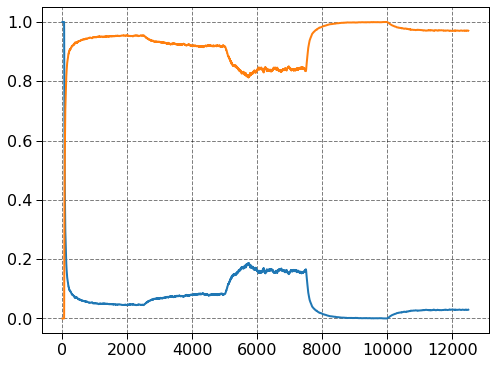

In [697]:
Z1_, Z2_, Z3_ = sp.symbols('Z1 Z2 Z3')

z1_min, z1_max = Z1_bounds
z2_min, z2_max = Z2_bounds
z3_min, z3_max = Z3_bounds

M1 = (Z1_ - z1_min) / (z1_max - z1_min)
N1 = (Z2_ - z2_min) / (z2_max - z2_min)
P1 = (Z3_ - z3_min) / (z3_max - z3_min)

M2 = 1 - M1
N2 = 1 - N1
P2 = 1 - P1

M1_func = sp.lambdify([Z1_], M1)
N1_func = sp.lambdify([Z2_], N1)
P1_func = sp.lambdify([Z3_], P1)

M1_values = M1_func(Z1)
N1_values = N1_func(Z2)
P1_values = P1_func(Z3)

plt.plot(N1_values)
plt.plot(1-N1_values)

In [695]:
print(' ')
print(M1)
print(N1)
print(P1)
print(' ')
print(M2)
print(N2)
print(P2)

 
9150719.71133393*Z1 - 5877.32808711319
82.0022562085844*Z2 - 0.102477227864807
0.000587307446605506*Z3 + 0.985156412531603
 
5878.32808711319 - 9150719.71133393*Z1
1.10247722786481 - 82.0022562085844*Z2
0.014843587468397 - 0.000587307446605506*Z3


In [696]:
for i in range(len(A_vertices)):
    A = A_vertices[i]
    B = B_vertices[i]
    
    np.save(f'./vertices/A_{i}', A)
    np.save(f'./vertices/B_{i}', B)